In [329]:
##フィッティングに使うもの
from scipy.optimize import curve_fit
import numpy as np

## 図示のために使うもの
import seaborn as sns
import matplotlib.pyplot as plt

In [330]:
#フィットデータの読み込み
import pandas as pd
import os
#print(os.getcwd())
path = "result.csv"
data = pd.read_csv(path, index_col=0)
data = data[30:80]
forces = np.array(data["force"])
red = np.array(data["red_s"])
green = np.array(data["green_s"])
blue = np.array(data["blue_s"])


In [331]:
forces

array([0.294   , 0.3038  , 0.3136  , 0.3234  , 0.3332  , 0.343196,
       0.3528  , 0.363286, 0.372694, 0.382396, 0.392   , 0.40229 ,
       0.4116  , 0.42189 , 0.4312  , 0.441   , 0.4508  , 0.460796,
       0.470106, 0.48069 , 0.49    , 0.4998  , 0.5096  , 0.5194  ,
       0.5292  , 0.539   , 0.5488  , 0.5586  , 0.5684  , 0.5782  ,
       0.588   , 0.5978  , 0.6076  , 0.6174  , 0.6272  , 0.637   ,
       0.6468  , 0.6566  , 0.6664  , 0.676102, 0.686   , 0.6958  ,
       0.7056  , 0.7154  , 0.7252  , 0.735   , 0.744604, 0.7546  ,
       0.7644  , 0.7742  , 0.784   ])

In [332]:
#近似したい関数の定義
def nonlinear_fit(x,a,b,c,d,e,f):
    return  a * np.exp(f*x) * np.cos((2*np.pi/(b+c*x))*(x+d)) + e


In [340]:
param = []
param_ini = (1.5, 0.1, 0, 0, 1, 0)
param.append(1)
param[0], cov = curve_fit(nonlinear_fit, forces, red, maxfev=100000, p0=param_ini)
param.append(1)
param[1], cov = curve_fit(nonlinear_fit, forces, green, maxfev=100000, p0=param_ini)
param.append(1)
param[2], cov = curve_fit(nonlinear_fit, forces, blue, maxfev=100000, p0=param_ini)


In [334]:
print(param)

[array([-0.93587804,  0.0156752 ,  0.12470015, -0.13658106,  1.37162699,
        0.16940074]), array([ 3.74210909,  0.10457522,  0.01726777,  0.06444953,  1.36779056,
       -5.35769316]), array([-0.48323393,  0.06114372,  0.08114655,  0.0179832 ,  1.53309502,
        1.34761012])]


In [335]:
#フィットカーブの作成
x = np.arange(0.01,1,0.001)
fit = []
for i in range(3):
    a = param[i][0]; b=param[i][1]; c=param[i][2]; d=param[i][3]; e=param[i][4]; f=param[i][5]
    fit.append(nonlinear_fit(x,a,b,c,d,e,f)) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


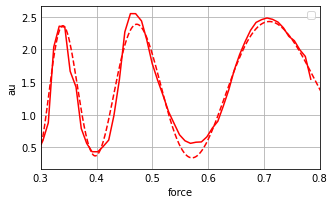

In [343]:

plt.figure(figsize=(5,3))
plt.plot(forces, red, color='red')

plt.plot(x, fit[0], color='red', linestyle='dashed')

#plt.yscale("log")
plt.legend(loc='best', fontsize=10)
plt.grid(),plt.tick_params(length=0)
plt.xlabel('force'), plt.ylabel('au')
#plt.ylim(0, 6), 
plt.xlim(0.3,0.8)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


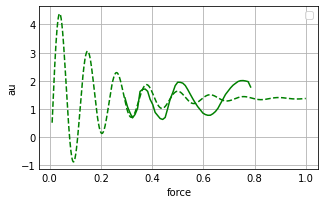

In [341]:

plt.figure(figsize=(5,3))
plt.plot(forces, green, color='green')

plt.plot(x, fit[1], color='green', linestyle='dashed')

#plt.yscale("log")
plt.legend(loc='best', fontsize=10)
plt.grid(),plt.tick_params(length=0)
plt.xlabel('force'), plt.ylabel('au')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


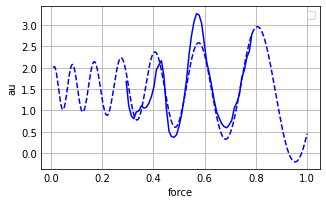

In [342]:

plt.figure(figsize=(5,3))

plt.plot(forces, blue, color='blue')


plt.plot(x, fit[2], color='blue', linestyle='dashed')

#plt.yscale("log")
plt.legend(loc='best', fontsize=10)
plt.grid(),plt.tick_params(length=0)
plt.xlabel('force'), plt.ylabel('au')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


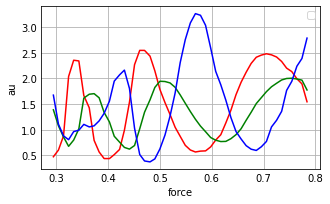

In [344]:

plt.figure(figsize=(5,3))
plt.plot(forces, red, color='red')
plt.plot(forces, green, color='green')
plt.plot(forces, blue, color='blue')

#plt.plot(x, fit[0], color='red', linestyle='dashed')
#plt.plot(x, fit[1], color='green', linestyle='dashed')
#plt.plot(x, fit[2], color='blue', linestyle='dashed')

#plt.yscale("log")
plt.legend(loc='best', fontsize=10)
plt.grid(),plt.tick_params(length=0)
plt.xlabel('force'), plt.ylabel('au')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


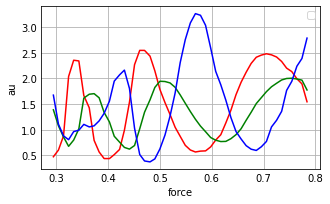

In [345]:

plt.figure(figsize=(5,3))
plt.plot(forces, red, color='red')
plt.plot(forces, green, color='green')
plt.plot(forces, blue, color='blue')

#plt.plot(x, fit[0], color='red', linestyle='dashed')
#plt.plot(x, fit[1], color='green', linestyle='dashed')
#plt.plot(x, fit[2], color='blue', linestyle='dashed')

#plt.yscale("log")
plt.legend(loc='best', fontsize=10)
plt.grid(),plt.tick_params(length=0)
plt.xlabel('force'), plt.ylabel('au')
plt.show()